In [10]:
library("igraph")

In [11]:
# Q1: Create a weighted undirected movie network
g = read.graph("movie_graph_edge_list.txt", format = "ncol", directed=FALSE)

# png(filename="2_1.png")
# plot(g,vertex.size=2,vertex.label=NA)

2.3 Neighborhood analysis of movies
---

- Question 9: For each of the movies listed above, extract it’s neighbors
and plot the distribution of the available ratings of the movies in the
neighborhood. Is the average rating of the movies in the neighborhood
similar to the rating of the movie whose neighbors have been extracted?
In this question, you should have 3 plots.

The average rating of Batman v Superman: Dawn of Justice (2016) =  6.213699

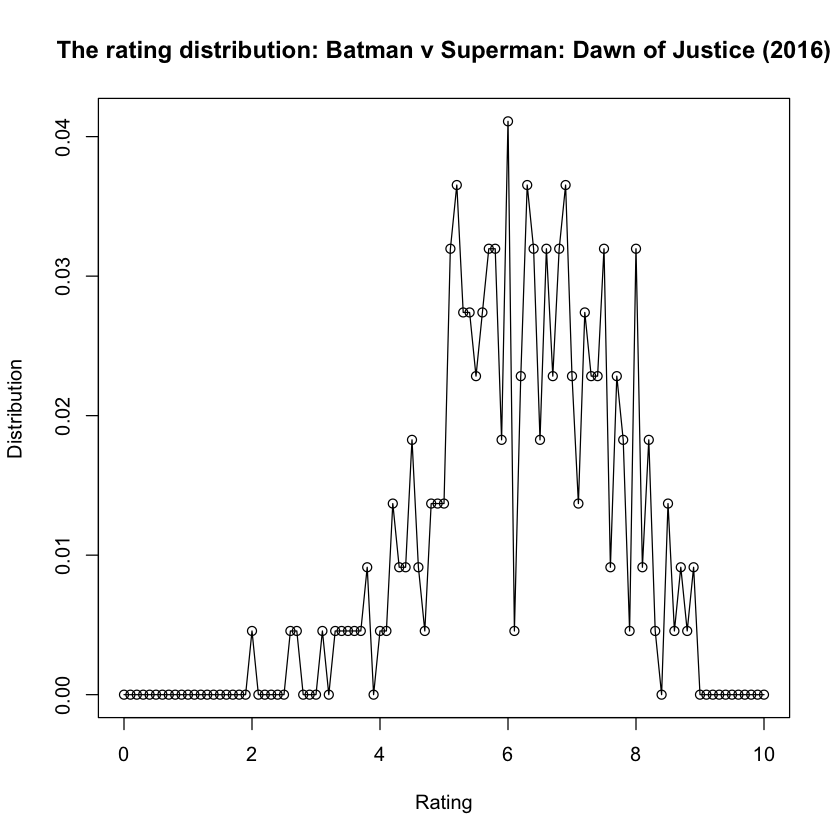

In [12]:
movie_id01=12596
induced_graph01=induced_subgraph(g,c(movie_id01,neighbors(g,movie_id01)))

# load rating file
filepath1 = "movie_idrating_map.txt"
df_movie_id_rating <- read.table(filepath1, header = FALSE, 
                                 sep = '\t', col.names=c('movie_id','movie_rating'))
# df_movie_id_rating
neighbor1=V(induced_graph01)
len=length(neighbor1)
x=seq(0,10,0.1)
y=rep(0,length(x))
for (i in 1:length(neighbor1)){
    id=neighbor1[i]
    rating = df_movie_id_rating$movie_rating[df_movie_id_rating$movie_id == id]
    if (rating != "NAN")
    {
        idx=rating*10+1
        y[idx]=y[idx]+1
    }
}
distribution=y/sum(y)
plot(x,distribution,type='o',lwd=1, xlab="Rating",ylab="Distribution",
     main="The rating distribution: Batman v Superman: Dawn of Justice (2016)")
EX=0
for (i in 1:length(x)){
    EX=EX+x[i]*distribution[i]
}
cat("The average rating of Batman v Superman: Dawn of Justice (2016) = ",EX)


The average rating of Mission: Impossible - Rogue Nation (2015) =  6.16652

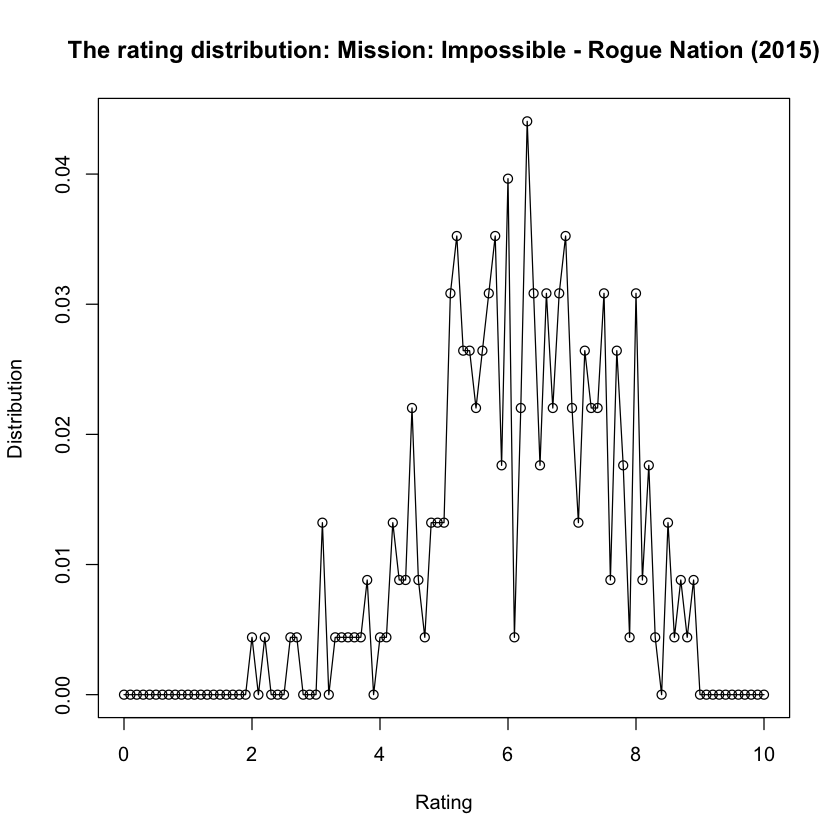

In [13]:
movie_id02=48391
induced_graph02=induced_subgraph(g,c(movie_id02,neighbors(g,movie_id02)))

# load rating file
filepath1 = "movie_idrating_map.txt"
df_movie_id_rating <- read.table(filepath1, header = FALSE, 
                                 sep = '\t', col.names=c('movie_id','movie_rating'))
# df_movie_id_rating
neighbor2=V(induced_graph02)
len=length(neighbor2)
x=seq(0,10,0.1)
y=rep(0,length(x))
for (i in 1:length(neighbor2)){
    id=neighbor2[i]
    rating = df_movie_id_rating$movie_rating[df_movie_id_rating$movie_id == id]
    if (rating != "NAN")
    {
        idx=rating*10+1
        y[idx]=y[idx]+1
    }
}
distribution=y/sum(y)
plot(x,distribution, type='o',lwd=1, xlab="Rating",ylab="Distribution",
     main="The rating distribution: Mission: Impossible - Rogue Nation (2015)")
EX=0
for (i in 1:length(x)){
    EX=EX+x[i]*distribution[i]
}
cat("The average rating of Mission: Impossible - Rogue Nation (2015) = ",EX)

The average rating of Minions (2015) =  6.196552

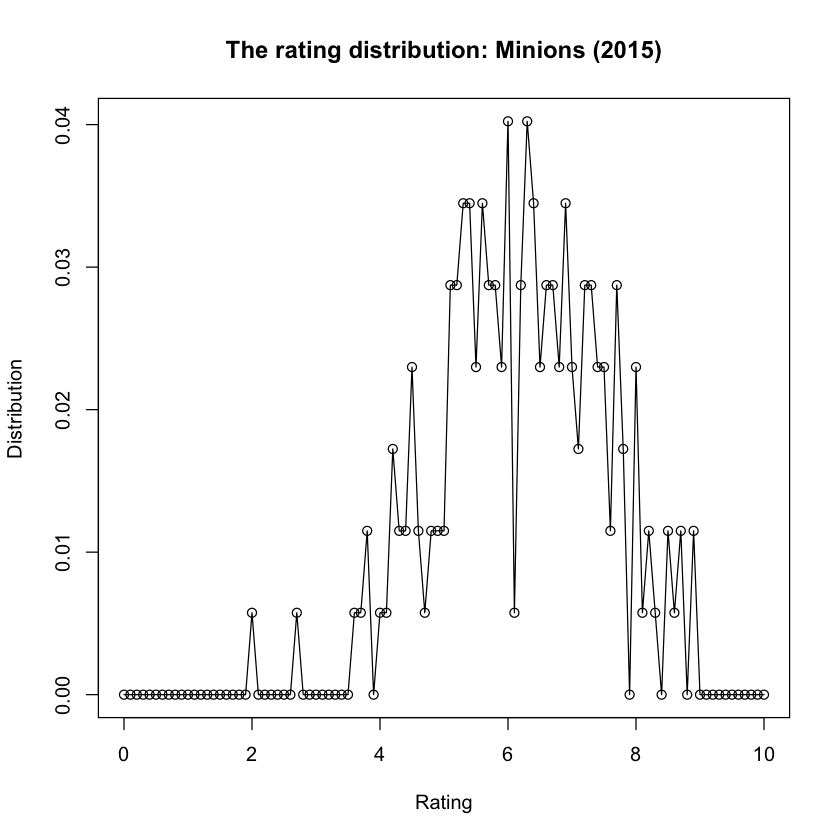

In [14]:
movie_id03=100856
induced_graph03=induced_subgraph(g,c(movie_id03,neighbors(g,movie_id03)))

# load rating file
filepath1 = "movie_idrating_map.txt"
df_movie_id_rating <- read.table(filepath1, header = FALSE, 
                                 sep = '\t', col.names=c('movie_id','movie_rating'))
# df_movie_id_rating
neighbor3=V(induced_graph03)
len=length(neighbor3)
x=seq(0,10,0.1)
y=rep(0,length(x))
for (i in 1:length(neighbor3)){
    id=neighbor3[i]
    rating = df_movie_id_rating$movie_rating[df_movie_id_rating$movie_id == id]
    if (rating != "NAN")
    {
        idx=rating*10+1
        y[idx]=y[idx]+1
    }
}
distribution=y/sum(y)
plot(x,distribution,type='o',lwd=1,xlab="Rating",ylab="Distribution",
     main="The rating distribution: Minions (2015)")
EX=0
for (i in 1:length(x)){
    EX=EX+x[i]*distribution[i]
}
cat("The average rating of Minions (2015) = ",EX)

- Question 10: Repeat question 9, but now restrict the neighborhood
to consist of movies from the same community. Is there a better match
between the average rating of the movies in the restricted neighborhood
and the rating of the movie whose neighbors have been extracted.
In this question, you should have 3 plots.

The average rating of Batman v Superman: Dawn of Justice (2016) =  6.292

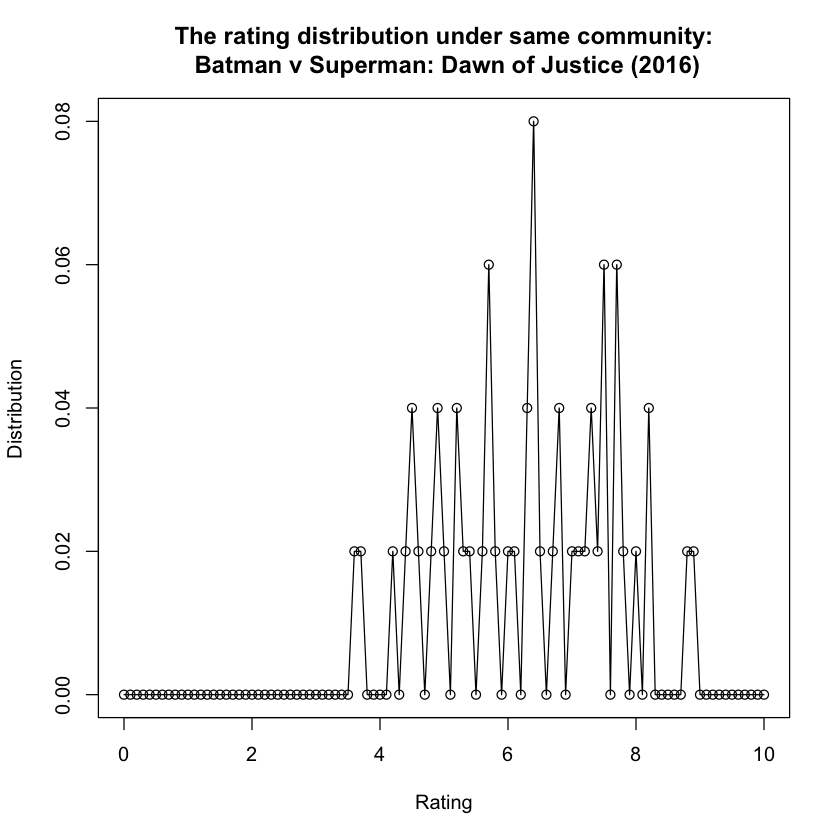

In [53]:
filepath2="community_movie.txt"
community_list=read.table(filepath2, header = FALSE, 
                                 sep = '\t', col.names=c('community_id','movie_id'))
# community_list
com_id=community_list$community_id[community_list$movie_id==movie_id01]
neighbors=rep(-1,length(neighbor1))
counter=1
for (i in 1:length(neighbor1)){
    idx=neighbor1[i]
    temp_id=community_list$community_id[community_list$movie_id==idx]
    if(length(temp_id)>0 && temp_id==com_id){
        neighbors[counter]=idx
        counter=counter+1
    }
}

x=seq(0,10,0.1)
y=rep(0,length(x))
for (i in 1:counter){
    id=neighbors[i]
    rating = df_movie_id_rating$movie_rating[df_movie_id_rating$movie_id == id]
    if (length(rating)>0 && rating != "NAN")
    {
        idx=rating*10+1
        y[idx]=y[idx]+1
    }
}
distribution=y/sum(y)
plot(x,distribution,type='o',lwd=1, xlab="Rating",ylab="Distribution",
     main="The rating distribution under same community:\n Batman v Superman: Dawn of Justice (2016)")
EX=0
for (i in 1:length(x)){
    EX=EX+x[i]*distribution[i]
}
cat("The average rating of Batman v Superman: Dawn of Justice (2016) = ",EX)


The average rating of Mission: Impossible - Rogue Nation (2015) =  6.096552

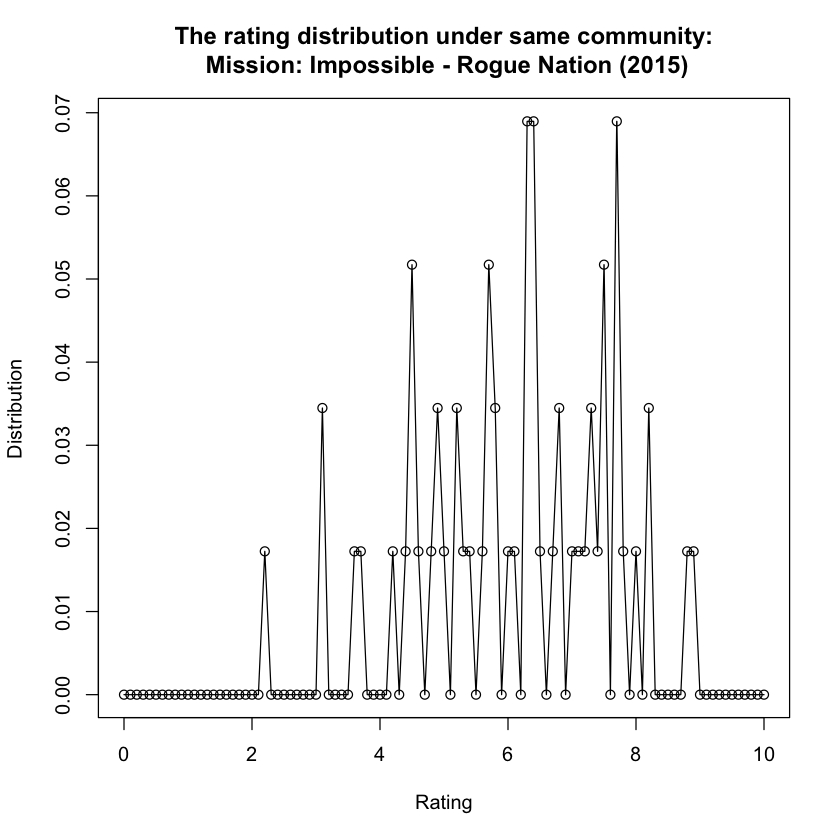

In [54]:
# community_list
com_id=community_list$community_id[community_list$movie_id==movie_id02]
neighbors=rep(-1,length(neighbor1))
counter=1
for (i in 1:length(neighbor2)){
    idx=neighbor2[i]
    temp_id=community_list$community_id[community_list$movie_id==idx]
    if(length(temp_id)>0 && temp_id==com_id){
        neighbors[counter]=idx
        counter=counter+1
    }
}

x=seq(0,10,0.1)
y=rep(0,length(x))
for (i in 1:counter){
    id=neighbors[i]
    rating = df_movie_id_rating$movie_rating[df_movie_id_rating$movie_id == id]
    if (length(rating)>0 && rating != "NAN")
    {
        idx=rating*10+1
        y[idx]=y[idx]+1
    }
}
distribution=y/sum(y)
plot(x,distribution, type='o',lwd=1, xlab="Rating",ylab="Distribution",
     main="The rating distribution under same community:\n Mission: Impossible - Rogue Nation (2015)")
EX=0
for (i in 1:length(x)){
    EX=EX+x[i]*distribution[i]
}
cat("The average rating of Mission: Impossible - Rogue Nation (2015) = ",EX)

The average rating of Minions (2015) =  6.224324

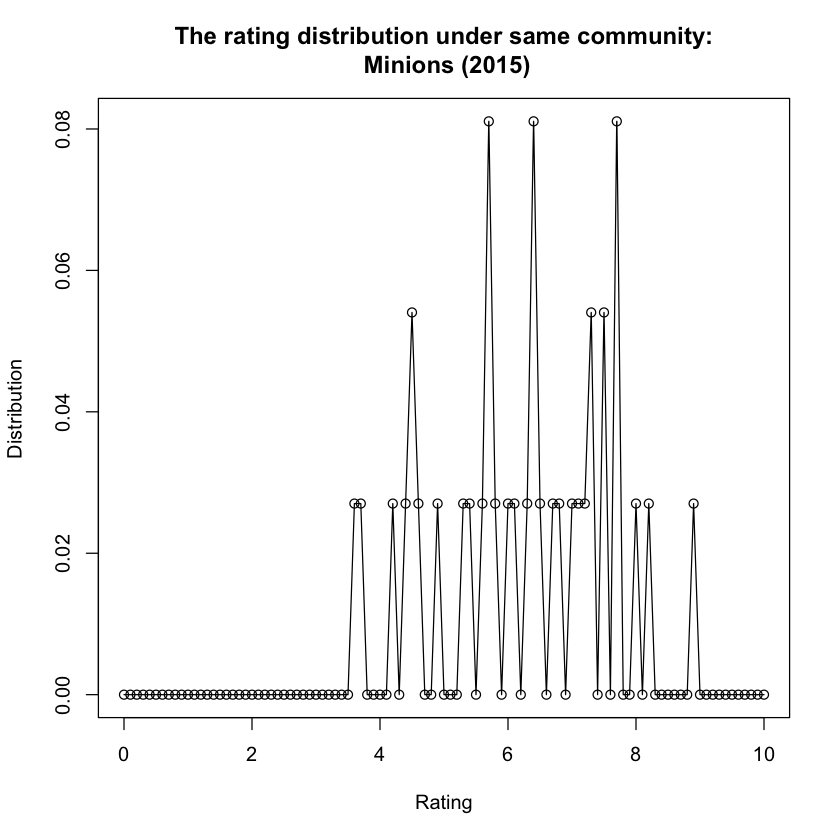

In [55]:
# community_list
com_id=community_list$community_id[community_list$movie_id==movie_id02]
neighbors=rep(-1,length(neighbor1))
counter=1
for (i in 1:length(neighbor3)){
    idx=neighbor3[i]
    temp_id=community_list$community_id[community_list$movie_id==idx]
    if(length(temp_id)>0 && temp_id==com_id){
        neighbors[counter]=idx
        counter=counter+1
    }
}

x=seq(0,10,0.1)
y=rep(0,length(x))
for (i in 1:counter){
    id=neighbors[i]
    rating = df_movie_id_rating$movie_rating[df_movie_id_rating$movie_id == id]
    if (length(rating)>0 && rating != "NAN")
    {
        idx=rating*10+1
        y[idx]=y[idx]+1
    }
}
distribution=y/sum(y)
plot(x,distribution,type='o',lwd=1,xlab="Rating",ylab="Distribution",
     main="The rating distribution under same community:\n Minions (2015)")
EX=0
for (i in 1:length(x)){
    EX=EX+x[i]*distribution[i]
}
cat("The average rating of Minions (2015) = ",EX)

- Question 11: For each of the movies listed above, extract it’s top 5 neighbors
and also report the community membership of the top 5 neighbors.
In this question, the sorting is done based on the edge weights.

In [90]:
movie_interest=c(movie_id01,movie_id02,movie_id03)
# print(1)
for (movie_id in movie_interest)
{
#     movie_id=which(V(g)$name==id)
    neighbor_node_set=neighbors(g,movie_id)
#     print(length(neighbor_node_set))
    neighbor_weight_set=numeric(0)
    for (neighbor_node in neighbor_node_set)
    {
        neighbor_weight=E(g,P=c(movie_id,neighbor_node))$weight
#         print(neighbor_weight)
        neighbor_weight_set=c(neighbor_weight_set,neighbor_weight)
    }
#     print(neighbor_weight_set)
    sorted_weight_set=sort(neighbor_weight_set,decreasing=T,index.return=T)
#     print(sorted_weight_set) 
    nearest_neighbor_idx=neighbor_node_set[sorted_weight_set$ix[1:5]]
    cat("Top 5 neighbors of ",movie_id," is: ",nearest_neighbor_idx,'\n')
}

Top 5 neighbors of  12596  is:  12592 8324 111284 3086 10876 
Top 5 neighbors of  48391  is:  48407 28131 48406 99122 30291 
Top 5 neighbors of  100856  is:  101000 100943 101038 100637 190806 


In [99]:
community_set=numeric(0)
top_neighbor=c(12592,8324,111284,3086,10876)
community_set=numeric(0)
for (node in top_neighbor){
    temp_id=community_list$community_id[community_list$movie_id==node]
    if(length(temp_id)==0)
    {
        community_set=c(community_set,NaN)
    }
    else
    {
        community_set=c(community_set,temp_id)
    }
}
cat("The 1st corresponding community ID: ", community_set,'\n')
top_neighbor=c(48407,28131,48406,99122,30291)
community_set=numeric(0)
for (node in top_neighbor){
    temp_id=community_list$community_id[community_list$movie_id==node]
    if(length(temp_id)==0)
    {
        community_set=c(community_set,NaN)
    }
    else
    {
        community_set=c(community_set,temp_id)
    }
}
cat("The 2nd corresponding community ID: ",community_set,'\n')
top_neighbor=c(101000,100943,101038,100637,190806)
community_set=numeric(0)
for (node in top_neighbor){
    temp_id=community_list$community_id[community_list$movie_id==node]
    if(length(temp_id)==0)
    {
        community_set=c(community_set,NaN)
    }
    else
    {
        community_set=c(community_set,temp_id)
    }
}
cat("The 3rd corresponding community ID: ",community_set,'\n')


The 1st corresponding community ID:  NaN 6 2 21 NaN 
The 2nd corresponding community ID:  1 1 NaN NaN NaN 
The 3rd corresponding community ID:  2 NaN 6 NaN NaN 
